Our objective is to develop a mathematical model, which recovers from data of reported cases, the number of unreported cases for the COVID-19 epidemic in Palestine. We address the following fundamental issues concerning this epidemic: How will the epidemic evolve in Palestine with respect to the number of reported cases and unreported cases? How will the number of unreported cases influence the severity of the epidemic? How will public health measures, such as isolation, quarantine, and public closings, mitigate the final size of the epidemic?


We use a set of reported data to model the epidemic in Palestine: data from the Palestinian Health Commission. It represents the epidemic transmission in Palestine. The first case was detected on March 5, 2020. Four deaths are reported until now for more than 400 total infected cases.

In [36]:
import os
import time
from datetime import date, timedelta
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import requests 
from bs4 import BeautifulSoup

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

import io
import re
import itertools
import zipfile

import plotly.express as px
import plotly.graph_objects as go

import requests
import pandas as pd
from datetime import datetime
import pandas

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import interpolate
import pylab
from IPython.core.display import Image 
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime
import math
from pandas import DataFrame

import datetime
from datetime import date

from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import scipy
import scipy.signal

https://www.worldometers.info/coronavirus/country/state-of-palestine/
and
 https://corona.ps/details

In [2]:
# https://www.worldometers.info/world-population/state-of-palestine-population/
N = 5077760/1000

In [3]:
#data = pd.read_csv("data-rLdjy.csv")

In [4]:
#data.tail()

In [5]:
#data.columns

In [6]:
#data = data.rename(columns = {'التاريخ' : 'date', 
#                   'اجمالي الاصابات': 'totalcases', 
#                   'حالات الشفاء' : 'recovery',
#                   'حالات الوفاة' : 'death',
#                   'الحالات الفعالة': 'activecases'
#                   }
#        )

In [7]:
#data = data.assign(
#         date = pd.to_datetime(data.date, format='%Y-%m-%d')
#         )

In [8]:
#data.tail()

In [9]:
#data.to_csv(r'palestine.csv', index = False)

In [10]:
#df = data.values

In [11]:
#ct = df[:,1]
#print(ct)

In [12]:
#mt = df[:,3]
#print(mt)

In [13]:
#https://github.com/CSSEGISandData/COVID-19
#https://www.worldometers.info/coronavirus/country/state-of-palestine/
ct = [0, 0, 7, 16, 19, 19, 26, 30, 30, 31, 35, 38, 38, 39, 44, 44, 47, 48, 52, 59, 59, 60, 71, 84, 91,
 98, 108, 117, 119, 133, 161, 194, 217, 237, 254, 261, 263, 263, 267, 268, 290, 308, 374, 374, 402, 418, 439, 449,466]
mt = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,4]

In [14]:
len(ct)==len(mt), len(ct)

(True, 49)

In [15]:
#data.columns

In [16]:
#df = data.values

In [17]:
#df[1,]

In [18]:
#df[40,2]

In [19]:
#n = len(df)-1
n = len(ct)-1
from datetime import date
import datetime
register_matplotlib_converters()

Time = np.arange(0, n+1)

# create dates
start_day_palestine = date(2020, 3, 5)
dates_palestine = [start_day_palestine + datetime.timedelta(i) for i in range(n+1)]

start_day = date(2020, 2, 15)
dates = [start_day + datetime.timedelta(i) for i in range(n+1)]
#print(dates_palestine)

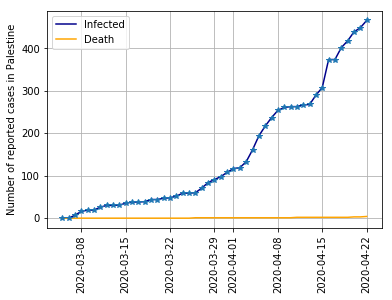

In [20]:
register_matplotlib_converters()
plt.plot(dates_palestine, ct, color = 'darkblue', label = 'Infected')
plt.plot(dates_palestine, mt, color = 'orange', label = 'Death')

#plt.title('Data from Ines Tej')
#plt.suptitle('Tunisia Trending')
plt.legend()
#plt.xlabel('Days')
plt.ylabel('Number of reported cases in Palestine')
plt.xticks(rotation=90)


#fig = plt.subplots()
#line1,= plt.plot(timeSet, CasesSet)
line2,=plt.plot(dates_palestine, ct,'*',label='Reported cases')
#plt.legend()
#plt.xlabel('Time (days)')
#plt.ylabel('Number of infected cases')
#plt.title('Evolution of COVID-19s cases in Tunisia')
plt.grid()
plt.show()

In [21]:
mt[n]/ct[n]

0.008583690987124463

In [22]:
taux = [ct[i+1]/ct[i] for i in range(2,n-1)]
statistics.median(taux), print(len(taux)), len(dates_palestine[2:n-1])

45


(1.0748663101604279, None, 45)

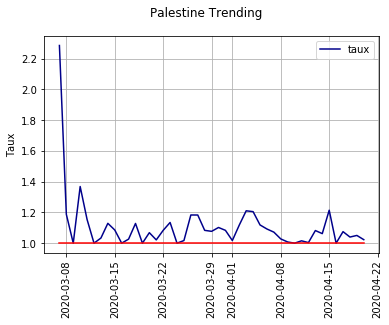

In [23]:
register_matplotlib_converters()
plt.plot(dates_palestine[2:n-1], taux, 'b-', color = 'darkblue', label = 'taux')
plt.plot(dates_palestine[2:n-1], [1 for i in range(2,n-1)], color = 'red')
#plt.title('Data from Ines Tej')
plt.suptitle('Palestine Trending')
plt.legend()
#plt.xlabel('Date')
plt.ylabel('Taux')
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [24]:
#i = 30
#df[i,0], df[i,1], df[i,2], df[i,3]

49
47 48


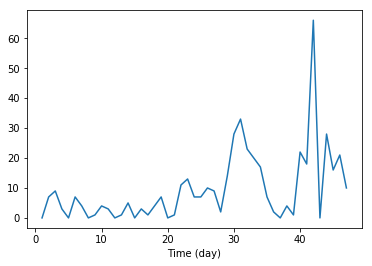

In [25]:
import numpy as np
timeSet = np.arange(0, n, 1)
date = timeSet.reshape(-1,1)
print(len(dates))
n = len(ct)-1
daily = [ct[i+1]-ct[i] for i in range(n-1)]
print(len(daily), n)
p = plt.plot(timeSet[1:n], daily, '-')
plt.xlabel('Time (day)')

plt.show(p)

49


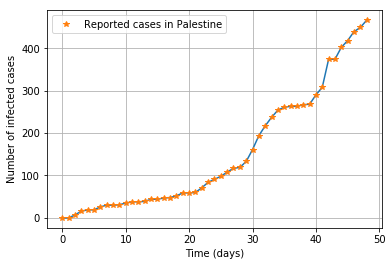

In [26]:
fig = plt.subplots()
timeSet = np.arange(0, n+1, 1)
line1,= plt.plot(timeSet, ct)
line2,=plt.plot(timeSet, ct,'*',label='Reported cases in Palestine')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Number of infected cases')
#plt.title('Evolution of COVID-19s cases in Palestine')
plt.grid()
print(len(ct))
plt.show()

0.006757613730334684
1 1


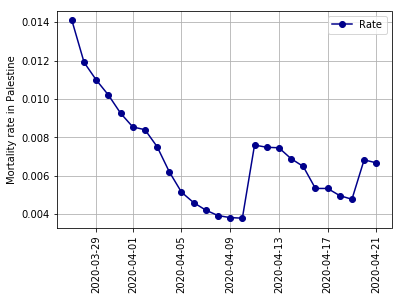

In [27]:
Tm = [mt[i]/ct[i] for i in range(22,n)]
print(statistics.median(Tm))
register_matplotlib_converters()
plt.plot(dates_palestine[22:n], Tm, 'o-', color = 'darkblue', label = 'Rate')
#plt.title('Données de Ines Tej')
#plt.suptitle('Evolution of mortality rate in Tunisia')
plt.legend()
#plt.xlabel('Time (Days)')
plt.ylabel('Mortality rate in Palestine')
plt.xticks(rotation=90)
plt.grid()
print(mt[21], mt[22])
plt.show()

In [28]:
min(Tm), max(Tm), statistics.median(Tm)

(0.0038022813688212928, 0.014084507042253521, 0.006757613730334684)

In [29]:
x0 = np.arange(n)
ct = [ct[i] for i in range(n)]
mt = [mt[i] for i in range(n)]
len(mt)==len(x0)

True

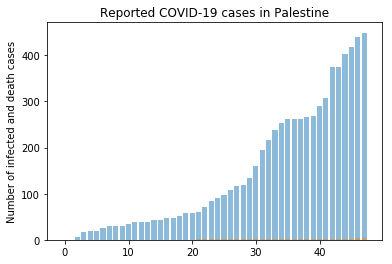

In [30]:
plt.bar(x0, ct, align='center', alpha=0.5, label="Infected cases")
plt.bar(x0, mt, align='center', alpha=0.5, label="Death cases")
plt.ylabel('Number of infected and death cases')
plt.title('Reported COVID-19 cases in Palestine')
plt.show()

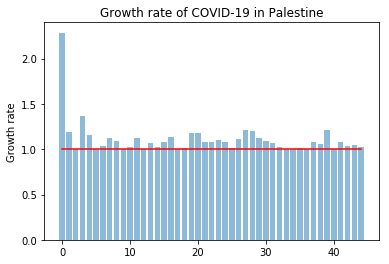

In [31]:
cum = [ct[i]/ct[i-1] for i in range(3,n)]
xcum = [i for i in range(len(cum))]
plt.bar(xcum, cum, align='center', alpha=0.5, label="Growth rate")
plt.ylabel('Growth rate')
plt.plot(xcum, [1 for i in range(len(xcum))], color='red')
plt.title('Growth rate of COVID-19 in Palestine')
plt.show()

In [283]:
mt[n-1]/ct[n-1]

0.0066815144766146995

/usr/local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



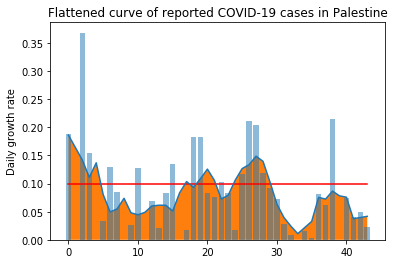

In [38]:
cum = [(ct[i+1]-ct[i])/ct[i] for i in range(3,n-1)]
xcum = [i for i in range(len(cum))]

fig2, ax2 = plt.subplots(1,1)
plt.plot(xcum, [0.1 for i in range(len(xcum))], color='red')
plt.bar(xcum, cum, align='center', alpha=0.5, label="Growth rate")
plt.ylabel('Daily growth rate')
plt.title('Growth rate of COVID-19 in Palestine')
yhat = np.array(scipy.signal.savgol_filter(cum, 5, 1)) # window size 51, polynomial order 3


#plt.plot(x0[2:],x3, '-', color='red')
plt.plot(xcum, yhat)
#plt.bar(xcum, x1[2:], align='center', alpha=0.5, label="Infected cases")
ax2.fill_between(xcum, 0, yhat)
#plt.ylabel('Daily number of cases')
plt.title('Flattened curve of reported COVID-19 cases in Palestine')

plt.show()

In [39]:
statistics.median(cum)

0.07329813398316748

In [40]:
x0 = [i for i in range(n-1)]
x1 = [ct[i+1]-ct[i] for i in range(n-1)]
x2 = [mt[i+1]-mt[i] for i in range(n-1)]
x3 = [ct[i]/i for i in range(1,n-1)]

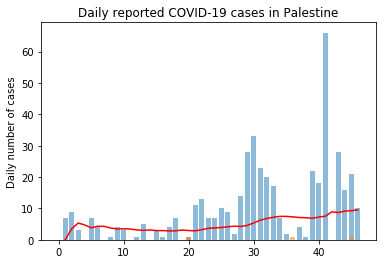

In [41]:
plt.bar(x0, x1, align='center', alpha=0.5, label="Infected cases")
plt.bar(x0, x2, align='center', alpha=0.5, label="Death cases")
plt.ylabel('Daily number of cases')
plt.title('Daily reported COVID-19 cases in Palestine')
#x3 = [round(x1[i]/3,1) for i in range(n-1)]
plt.plot(x0[1:],x3, '-', color='red')

plt.show()

/usr/local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



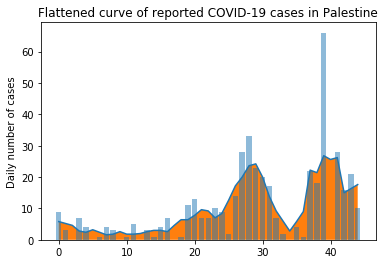

In [42]:
import scipy.signal
import scipy

x3 = np.array([x1[i] for i in range(2,n-1)])
yhat = np.array(scipy.signal.savgol_filter(x3, 5, 1)) # window size 51, polynomial order 3
x0 = np.array([i for i in range(len(x3))])

fig2, ax2 = plt.subplots(1,1)
#plt.plot(x0[2:],x3, '-', color='red')
plt.plot(x0, yhat)
plt.bar(x0, x1[2:], align='center', alpha=0.5, label="Infected cases")
ax2.fill_between(x0, 0, yhat)
plt.ylabel('Daily number of cases')
plt.title('Flattened curve of reported COVID-19 cases in Palestine')
plt.show()

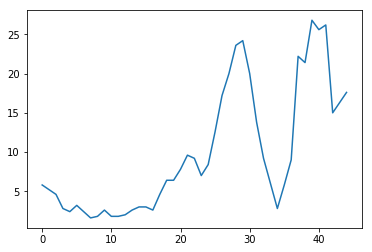

In [43]:
from matplotlib.patches import Polygon
plt.plot(x0, yhat)

ax2.fill_between(x0, 0, yhat)

plt.show()

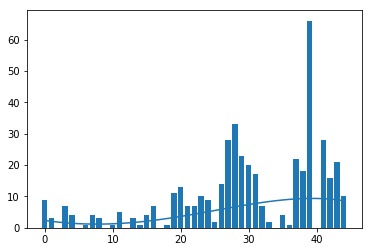

[ 2.34682662e+00 -3.10496938e-01  2.08948437e-02 -5.47206638e-06]


In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# "x" is data, a,b,c are parameters
def func(x, a, b, c, d):
   return a + b*x +c*x*x + d*x**4# example function


xData = np.array(x0)
yData = np.array(x3)

# curve fit the data using curve_fit's default inital parameter estimates
fittedParameters, pcov = curve_fit(func, xData, yData/2)

y_fit = func(xData, *fittedParameters)

plt.bar(xData, yData) # plot the raw data as bar chart
plt.plot(xData, y_fit) # plot the equation using the fitted parameters
plt.show()

print(fittedParameters)

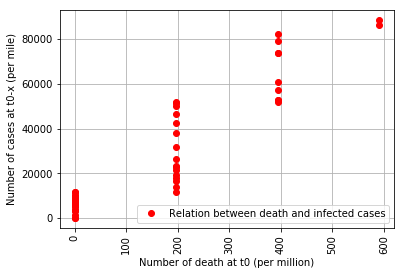

In [45]:
ct0 = [ct[i]/N*10**(6) for i in range(n)]
mt0 = [mt[i]/N*10**(6) for i in range(n)]
#register_matplotlib_converters()
y = 0
x = 0
plt.plot(mt0[x+y:n], ct0[y:n-x], 'o', color = 'red', label = 'Relation between death and infected cases')
#plt.title('Données de Ines Tej')
#plt.suptitle('Taux de mortalité en Tunisie')
plt.legend()
plt.xlabel('Number of death at t0 (per million)')
plt.ylabel('Number of cases at t0-x (per mile)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

0.028370221327967807
0.03540503182114856


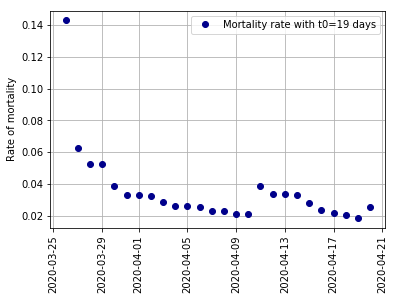

In [46]:
x = 19
y = x + 2
Tmx = [mt[i]/ct[i-x] for i in range(y,n-1)]

print(statistics.median(Tmx)); print(statistics.mean(Tmx))
register_matplotlib_converters()
plt.plot(dates_palestine[y:n-1], Tmx, 'o', color = 'darkblue', label = 'Mortality rate with t0=19 days')
#plt.title('Données de Ines Tej')
#plt.suptitle('Taux de mortalité en Tunisie')
plt.legend()
#plt.xlabel('Date')
plt.ylabel('Rate of mortality')
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [47]:
Mt0 = mt
Ct0 = ct

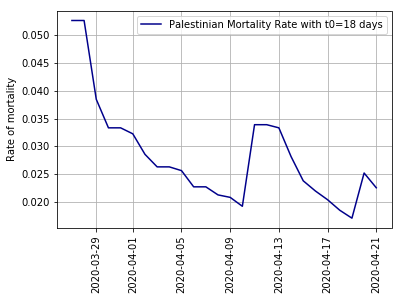

In [48]:
x = 18
y = x + 4
Tmx0 = [Mt0[i]/Ct0[i-x] for i in range(y,n)]
#Tmx1 = [Mt1[i]/Ct1[i-x] for i in range(y,n)]
dates_palestine[y+6]#, Tmx0, Tmx1

plt.plot(dates_palestine[y:n], Tmx0, 'b', color = 'darkblue', label = 'Palestinian Mortality Rate with t0=18 days')
#plt.plot(dates_tunisia[y:n], Tmx1, 'b', color = 'green', label = 'French Mortality rate with t0=18 days')
#plt.title('Données de Ines Tej')
#plt.suptitle('Taux de mortalité en Tunisie')
plt.legend()
#plt.xlabel('Date')
plt.ylabel('Rate of mortality')
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [49]:
dates[y]

datetime.date(2020, 3, 8)

In [50]:
statistics.median(Tmx0[6:n]), statistics.mean(Tmx[6:n])
statistics.median(Tmx), statistics.mean(Tmx)

(0.028370221327967807, 0.03540503182114856)

3.950416786432883
3.3759398496240602


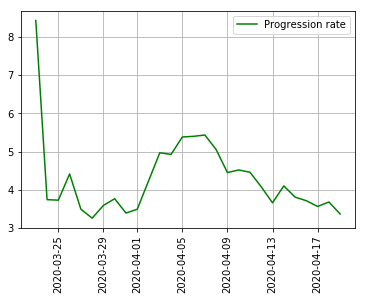

(3.2666666666666666, 8.428571428571429)

In [284]:
pTN = [Ct0[i]/Ct0[i-18] for i in range(20,n)] 
print(statistics.median(pTN)), print(pTN[len(pTN)-1])
register_matplotlib_converters()
plt.plot(dates_palestine[20:n], pTN, 'b', color = 'green', label = 'Progression rate')
#plt.title('Données de Ines Tej')
#plt.suptitle('Evolution of mortality rate in Tunisia')
plt.legend()
#plt.xlabel('Time (Days)')
#plt.ylabel('')
plt.xticks(rotation=90)
plt.grid()

plt.show()
min(pTN), max(pTN)

[8.428571428571429, 3.75, 3.736842105263158, 4.421052631578948, 3.5, 3.2666666666666666, 3.6, 3.774193548387097, 3.4, 3.5, 4.2368421052631575, 4.9743589743589745, 4.931818181818182, 5.386363636363637, 5.404255319148936, 5.4375, 5.0576923076923075, 4.4576271186440675, 4.52542372881356, 4.466666666666667, 4.084507042253521, 3.6666666666666665, 4.1098901098901095, 3.816326530612245, 3.7222222222222223, 3.572649572649573, 3.689075630252101, 3.3759398496240602]
3.3759398496240602


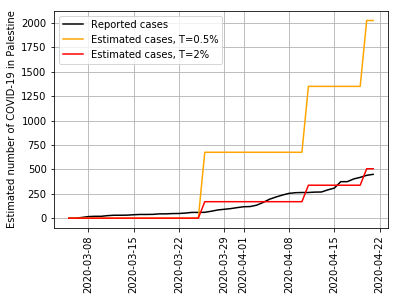

In [52]:
#taux = 0.15
print(pTN)
p18 = pTN[len(pTN)-1]
print(p18)
#p12 = 1.8
ct_2 = [round(Mt0[i]*p18/0.02, 1) for i in range(n)]
ct_4 = [round(Mt0[i]*p18/0.04, 1) for i in range(n)]
ct_5 = [round(Mt0[i]*p18/0.005, 1) for i in range(n)]
ct_15 = [round(Mt0[i]*p18/0.15, 1) for i in range(n)]

register_matplotlib_converters()

plt.plot(dates_palestine[:n], ct, color = 'black', label = 'Reported cases')
plt.plot(dates_palestine[:n], ct_5,color = 'orange',label = 'Estimated cases, T=0.5%')
plt.plot(dates_palestine[:n], ct_2,color = 'red',label = 'Estimated cases, T=2%')
#plt.plot(dates_palestine[:n], ct_4,color = 'green',label = 'Estimated cases, T=4%')
#plt.plot(dates_palestine[:n], ct_15,color = 'darkblue',label = 'Estimated cases, T=15%')
#plt.plot(dates_palestine[6:n], Ct0[6:n],color = 'blue',label = 'Reported cases')
#plt.plot(dates_palestine, Ct,color = 'darkblue',label = 'Death')
#plt.plot(dates_palestine[:n], Ct[:n],color = 'darkblue',label = 'Estimated number')

#plt.title('Data from Ines Tej')
#plt.suptitle('Palestine Trending')
plt.legend()
#plt.xlabel('Days')
plt.ylabel('Estimated number of COVID-19 in Palestine')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [54]:
print(ct_2)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 168.8, 337.6, 337.6, 337.6, 337.6, 337.6, 337.6, 337.6, 337.6, 337.6, 506.4, 506.4]


In [55]:
ct_5[n-1]/ct[n-1]

4.511358574610245

In [56]:
ct_2[n-1]/ct[n-1]

1.1278396436525613

In [57]:
Ct = [ct[i]*ct_5[n-1]/ct[n-1] for i in range(n)]
Ct2 = [ct[i]*ct_2[n-1]/ct[n-1] for i in range(n)]
print(Ct), print(Ct2)

[0.0, 0.0, 31.579510022271712, 72.18173719376392, 85.71581291759466, 85.71581291759466, 117.29532293986637, 135.34075723830736, 135.34075723830736, 139.8521158129176, 157.89755011135858, 171.43162583518932, 171.43162583518932, 175.94298440979955, 198.49977728285077, 198.49977728285077, 212.0338530066815, 216.54521158129174, 234.59064587973273, 266.17015590200447, 266.17015590200447, 270.6815144766147, 320.3064587973274, 378.9541202672606, 410.5336302895323, 442.113140311804, 487.22672605790643, 527.8289532293986, 536.8516703786191, 600.0106904231626, 726.3287305122494, 875.2035634743875, 978.9648106904231, 1069.191982182628, 1145.8850779510021, 1177.4645879732739, 1186.4873051224943, 1186.4873051224943, 1204.5327394209353, 1209.0440979955456, 1308.293986636971, 1389.4984409799554, 1687.2481069042317, 1687.2481069042317, 1813.5661469933184, 1885.7478841870823, 1980.4864142538972, 2025.5999999999997]
[0.0, 0.0, 7.894877505567928, 18.04543429844098, 21.428953229398665, 21.428953229398665,

(None, None)

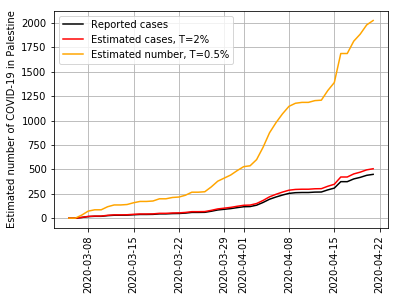

In [58]:
register_matplotlib_converters()

plt.plot(dates_palestine[:n], ct, color = 'black', label = 'Reported cases')
#plt.plot(dates_palestine[:n], ct_5,color = 'orange',label = 'Estimated cases, T=0.5%')
plt.plot(dates_palestine[:n], Ct2,color = 'red',label = 'Estimated cases, T=2%')
#plt.plot(dates_palestine[:n], ct_4,color = 'green',label = 'Estimated cases, T=4%')
#plt.plot(dates_palestine[:n], ct_15,color = 'darkblue',label = 'Estimated cases, T=15%')
#plt.plot(dates_palestine[6:n], Ct0[6:n],color = 'blue',label = 'Reported cases')
#plt.plot(dates_palestine, Ct,color = 'darkblue',label = 'Death')
plt.plot(dates_palestine[:n], Ct[:n],color = 'orange',label = 'Estimated number, T=0.5%')

#plt.title('Data from Ines Tej')
#plt.suptitle('Palestine Trending')
plt.legend()
#plt.xlabel('Days')
plt.ylabel('Estimated number of COVID-19 in Palestine')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [53]:
print(ct_5)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 675.2, 1350.4, 1350.4, 1350.4, 1350.4, 1350.4, 1350.4, 1350.4, 1350.4, 1350.4, 2025.6, 2025.6]


In [59]:
#Gaza au 18 avril 2020 :
13/418*1428

44.411483253588514

Le nouvel article de Marc, avec une formule de R3d ne fonctionne pas ici... Ou alors le calcul de la formule n'est pas bon. Je dois vérifier tout ça, mais une autre fois. L'article Abdeljaoued-Tej et Dhenain fonctionne suffisamment. 

In [60]:
Fr = 0.02
m = len(Mt0)-1
R3d = [(Mt0[i]/Fr)/(Mt0[i-3]/Fr) for i in range(24,m)]
print(R3d)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5]


1.0


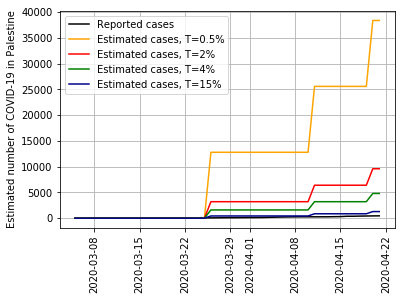

In [61]:
r3d = statistics.median(R3d)
print(r3d)
ct_2 = [round(Mt0[i]*(1+r3d)**6/0.02, 1) for i in range(n)]
ct_4 = [round(Mt0[i]*(1+r3d)**6/0.04, 1) for i in range(n)]
ct_5 = [round(Mt0[i]*(1+r3d)**6/0.005, 1) for i in range(n)]
ct_15 = [round(Mt0[i]*(1+r3d)**6/0.15, 1) for i in range(n)]

register_matplotlib_converters()

plt.plot(dates_palestine[:n], ct, color = 'black', label = 'Reported cases')
plt.plot(dates_palestine[:n], ct_5,color = 'orange',label = 'Estimated cases, T=0.5%')
plt.plot(dates_palestine[:n], ct_2,color = 'red',label = 'Estimated cases, T=2%')
plt.plot(dates_palestine[:n], ct_4,color = 'green',label = 'Estimated cases, T=4%')
plt.plot(dates_palestine[:n], ct_15,color = 'darkblue',label = 'Estimated cases, T=15%')
#plt.plot(dates_palestine[6:n], Ct0[6:n],color = 'blue',label = 'Reported cases')

#plt.title('Data from Ines Tej')
#plt.suptitle('Palestine Trending')
plt.legend()
#plt.xlabel('Days')
plt.ylabel('Estimated number of COVID-19 in Palestine')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [62]:
len(ct_2), len(Ct)

(48, 48)

In [340]:
p18

3.3759398496240602

In [342]:
cx4 = [ct[i]/p18*0.05 for i in range(n)]
print(cx4)

[0.0, 0.0, 0.10367483296213809, 0.23697104677060135, 0.28140311804008905, 0.28140311804008905, 0.3850779510022272, 0.44432071269487755, 0.44432071269487755, 0.4591314031180401, 0.5183741648106904, 0.5628062360801781, 0.5628062360801781, 0.5776169265033407, 0.6516703786191537, 0.6516703786191537, 0.6961024498886415, 0.7109131403118041, 0.7701559020044544, 0.8738307349665924, 0.8738307349665924, 0.8886414253897551, 1.0515590200445435, 1.244097995545657, 1.3477728285077952, 1.4514476614699332, 1.599554565701559, 1.7328507795100223, 1.7624721603563474, 1.9698218262806237, 2.3845211581291763, 2.873273942093541, 3.2139198218262806, 3.5101336302895323, 3.761915367483296, 3.865590200445434, 3.8952115812917594, 3.8952115812917594, 3.95445434298441, 3.9692650334075723, 4.295100222717149, 4.561692650334076, 5.539198218262807, 5.539198218262807, 5.953897550111359, 6.19086859688196, 6.501893095768374, 6.65]


### Assumption
Assume that infected individuals were not infectious during the incubation period (Wu et al. 2020; Zhou et al. 2020)
Assume population growth rate and death rate are zero
Assume people exhibit consistent behaviors before and during the epidemic
Assume no quarantine or other mitigation intervention is implemented

### Parameters
The value of R0 takes the newest estimation from Estimation of R0.ipynb as of writing this study Feb 15, 2020, while research varies from 1.4 to 3.9 (Who et al. 2020; Zhou et al. 2020; Read et al. 2020). 
The date Tunisia implemented lockdown, March 26, 2020, is used as the first day of the forecast for all the city.
The first case is documented on March 2, 2020 in Tunisia, which is used as the first day of the forecast for Tunisia. The number of initial infectious takes the value of confirm counts on March 26, 2020.

### Model

A typical SEIR (susceptible, exposed, infectious, removed) model can be described as a system of differential equations

\begin{eqnarray}
\frac{dS(t)}{dt}& = &-\beta \frac{S(t)I(t)}{N}\\
\frac{dE(t)}{dt}& = &\beta \frac{S(t)I(t)}{N} - \alpha E(t)\\
\frac{dI(t)}{dt}& = &\alpha E(t) - \gamma I(t)\\
\frac{dR(t)}{dt}& = &\gamma I(t) 
\end{eqnarray}

where,
$S(t)$ is the number of susceptible at time $t$, $E(t)$ is the number of exposed at time $t$, $I(t)$ is the number of infectious at time $t$, $R(t)$ is the number of removed, which includes the number of recovered and dead at time $t$, $N(t)$ is the population at time $t$ and $N(t) = S(t) + E(t) + I(t) + R(t)$.

### Analysis

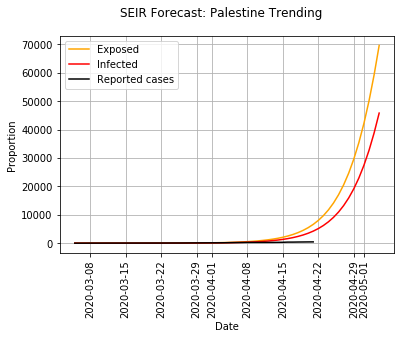

0.7 1.4 0.9 45813.0 60 2020-05-04


In [228]:
register_matplotlib_converters()
alpha = 0.7 
beta = 1.4
gamma = 0.9
N = 5077760
S0=N/1000
# differential equations
def SEIR(inivalue, _):
    Y = np.zeros(4)
    X = inivalue
    # dS/dt
    Y[0] = - (beta * X[0] * X[2]) / N
    # dE/dt
    Y[1] = (beta * X[0] * X[2]) / N - X[1] * alpha
    # dI/dt
    Y[2] = X[1] * alpha - gamma * X[2]
    # dR/dt
    Y[3] = gamma * X[2]
    return Y

T = 60
Time = np.arange(0, T + 1)

# create dates
from datetime import date
import datetime
start_day_palestine = date(2020, 3, 5)
dates_palestine = [start_day_palestine + datetime.timedelta(i) for i in range(T + 1)]


start_day = date(2020, 2, 25)
dates = [start_day + datetime.timedelta(n) for n in range(T + 1)]

INI = (N, 0, 1, 0)
# solve the system of differential equations
RES = spi.odeint(SEIR, INI, Time)

dt = [start_day_palestine + datetime.timedelta(i) for i in range(n)]

#plt.plot(dates_palestine, RES[:,0],color = 'darkblue',label = 'Susceptible')
plt.plot(dates_palestine, RES[:,1],color = 'orange',label = 'Exposed')
plt.plot(dates_palestine, RES[:,2],color = 'red',label = 'Infected')
#plt.plot(dates_palestine, RES[:,3],color = 'green',label = 'Removed')
plt.plot(dt, ct, color = 'black', label = 'Reported cases')

#plt.title('Data from Ines Tej')
plt.suptitle('SEIR Forecast: Palestine Trending')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print(alpha, beta, gamma, round(max(RES[:,2]), 0), np.argmax(RES[:,2]), start_day_palestine + datetime.timedelta(int(np.argmax(RES[:,2]))))
# plt.savefig('palestine.png')

In [229]:
print(len(Time))
def sumsq(p):
    alpha, beta, gamma = p
    def SEIR(inivalue, _):
        Y = np.zeros(4)
        X = inivalue
        # dS/dt
        Y[0] = - (beta * X[0] * X[2]) / N
        # dE/dt
        Y[1] = (beta * X[0] * X[2]) / N - X[1] * alpha
        # dI/dt
        Y[2] = X[1] * alpha - gamma * X[2]
        # dR/dt
        Y[3] = gamma * X[2]
        return Y
    
    RES = spi.odeint(SEIR, (N, 0, 1, 0), Time[:n])
    #print(RES)
    return(sum(RES[:,2] - ct)**2)

msol = minimize(sumsq, [0.7, 1.2, 1.2], method='Nelder-Mead')
msol.x

61


array([0.73930048, 1.38084689, 0.96238144])

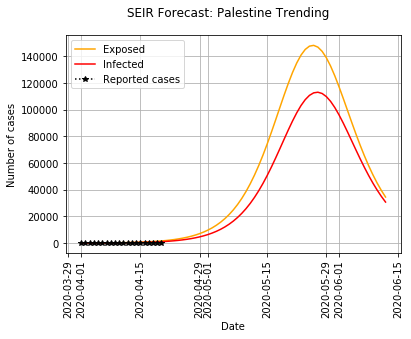

0.7393004782746432 1.3808468918161858 0.9623814418526999 113171.0 84 2020-05-27


In [230]:
# differential equations
alpha, beta, gamma = msol.x
def SEIR(inivalue, _):
    Y = np.zeros(4)
    X = inivalue
    # dS/dt
    Y[0] = - (beta * X[0] * X[2]) / N
    # dE/dt
    Y[1] = (beta * X[0] * X[2]) / N - X[1] * alpha
    # dI/dt
    Y[2] = X[1] * alpha - gamma * X[2]
    # dR/dt
    Y[3] = gamma * X[2]
    return Y

T = 100
Time = np.arange(0, T + 1)

# create dates
start_day_palestine = date(2020, 3, 4)
dates_palestine = [start_day_palestine + datetime.timedelta(n) for n in range(T + 1)]

start_day = date(2020, 3, 3)
dates = [start_day + datetime.timedelta(n) for n in range(T + 1)]

INI = (N, 0, 1, 0)
# solve the system of differential equations
RES = spi.odeint(SEIR, INI, Time)

dt = [start_day_palestine + datetime.timedelta(i) for i in range(n)]

#plt.plot(dates_palestine[28:], RES[28:,0],color = 'darkblue',label = 'Susceptible')
plt.plot(dates_palestine[28:], RES[28:,1],color = 'orange',label = 'Exposed')
plt.plot(dates_palestine[28:], RES[28:,2],color = 'red',label = 'Infected')
#plt.plot(dates_palestine[28:], RES[28:,3],color = 'green',label = 'Removed')
plt.plot(dt[28:], ct[28:], "k*:", color = 'black', label = 'Reported cases')

#plt.title('Data from Ines Tej')
plt.suptitle('SEIR Forecast: Palestine Trending')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print(alpha, beta, gamma, round(max(RES[:,2]), 0), np.argmax(RES[:,2]), start_day_palestine + datetime.timedelta(int(np.argmax(RES[:,2]))))
# plt.savefig('palestine.png')

In [231]:
gamma

0.9623814418526999

#### Keywords: 
corona virus; reported and unreported cases; isolation; quarantine; public closings; epidemic mathematical model

## Introduction
Our objective is to develop a mathematical model, which recovers from data of reported cases, the number of unreported cases for the COVID-19 epidemic in Tunisia. For this epidemic, a modeling approach has been developed in `Tang et al. 2020`, which did not consider unreported cases. Our work continues the investigation in `Magal et al. (2020)`, `Ducrot et al. (2020)` and `Liu et al. (2020)` of the fundamental problem of parameter identification in mathematical epidemic models. We address the following fundamental issues concerning this epidemic: How will the epidemic evolve in Tunisia with respect to the number of reported cases and unreported cases? How will the number of unreported cases influence the severity of the epidemic? How will public health measures, such as isolation, quarantine, and public closings, mitigate the final size of the epidemic?


## Results

Our model consists of the following system of ordinary differential equations: 

\begin{eqnarray}
S'(t) &= &-\tau S(t) [I(t) + E(t)], \\
E'(t) &=& \nu_2 I(t) - \eta E(t), \\
I'(t) &=& \tau S(t) [I(t) + E(t)] - \nu I(t), \\
R'(t) &=& \nu_1 I(t) - \eta R(t). \\ 
\end{eqnarray}

Here, $t \geq t_0$ is time in days, $t_0$ is the beginning date of the epidemic, $S(t)$ is the number of individuals susceptible to infection at time $t$, $I(t)$ is the number of asymptomatic infectious individuals at time $t$, $R(t)$ is the number of reported symptomatic infectious individuals (i.e. symptomatic infectious with sever symptoms) at time $t$, and $E(t)$ is the number of unreported symptomatic infectious individuals (i.e. symptomatic infectious with mild symptoms) at time $t$. This system is supplemented by initial data
$$S(t_0) = S0 > 0,\; I(t_0) = I_0 > 0,\; R(t_0) = 0\qquad and\qquad E(t_0) = E_0 \geq 0.$$


The flow chart of the model and the parameters are listed below:

\begin{center}
\includegraphics[width=0.7\textwidth]{cap-1.png}
\end{center}



\begin{tabular}{|c|l|l|} \hline
Symbol & Interpretation & Method \\ \hline
$t_0$ &Time at which the epidemic started &fitted \\ \hline
$S_0$ &Number of susceptible at time $t_0$ & {\bf fixed} \\ \hline
$I_0$ &Number of asymptomatic infectious at time $t_0$ &fitted \\ \hline
$E_0$ &Number of unreported symptomatic infectious at time $t_0$ &fitted \\ \hline
$\tau$ &Transmission rate &fitted \\ \hline
$1/\nu$ & Average time during which asymptomatic infectious are asymptomatic &{\bf fixed} \\ \hline
$f$ & Fraction of asymptomatic infectious that become reported symptomatic infectious &{\bf fixed} \\ \hline
$\nu_1 = f \nu$ & Rate at which asymptomatic infectious become reported symptomatic&fitted \\ \hline
$\nu_2 = (1-f) \nu$ & Rate at which asymptomatic infectious become unreported symptomatic &fitted \\ \hline
$1/\eta$ &Average time symptomatic infectious have symptoms &{\bf fixed} \\ \hline
\end{tabular}

We use a set of reported data to model the epidemic in Tunisia: data from the Tunisian Health Commission for Tunisia. It represents the epidemic transmission in Tunisia. The first case was detected on March 2, 2020.


The basic reproductive number becomes: $R_0 = \frac{\tau S_0}{\nu} (1+\frac{(1-f)\nu}{\eta})$.

### Risk of transmission COVID-19
Tang et a. 2020

In [232]:
N = 5077760
S0 = N/100

In [233]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

In [234]:
f = 0.6 #unknown
eta = 1/7
nu = 1/7

CR(t)+1 = chi_1 exp(chi_2*t)
I0 = ; U0 = ; R0 = 1

In [235]:
Ct = [ct[i]+1 for i in range(n)]
len(Ct)

48

In [236]:
print(Ct), len(Ct), n, print(dates_palestine[:n+1])

[1, 1, 8, 17, 20, 20, 27, 31, 31, 32, 36, 39, 39, 40, 45, 45, 48, 49, 53, 60, 60, 61, 72, 85, 92, 99, 109, 118, 120, 134, 162, 195, 218, 238, 255, 262, 264, 264, 268, 269, 291, 309, 375, 375, 403, 419, 440, 450]
[datetime.date(2020, 3, 4), datetime.date(2020, 3, 5), datetime.date(2020, 3, 6), datetime.date(2020, 3, 7), datetime.date(2020, 3, 8), datetime.date(2020, 3, 9), datetime.date(2020, 3, 10), datetime.date(2020, 3, 11), datetime.date(2020, 3, 12), datetime.date(2020, 3, 13), datetime.date(2020, 3, 14), datetime.date(2020, 3, 15), datetime.date(2020, 3, 16), datetime.date(2020, 3, 17), datetime.date(2020, 3, 18), datetime.date(2020, 3, 19), datetime.date(2020, 3, 20), datetime.date(2020, 3, 21), datetime.date(2020, 3, 22), datetime.date(2020, 3, 23), datetime.date(2020, 3, 24), datetime.date(2020, 3, 25), datetime.date(2020, 3, 26), datetime.date(2020, 3, 27), datetime.date(2020, 3, 28), datetime.date(2020, 3, 29), datetime.date(2020, 3, 30), datetime.date(2020, 3, 31), datetime.

(None, 48, 48, None)

14 14
[ 2.51951827e+01  1.63544512e-01 -1.93859835e+02]
a = 25.19518268743067 , b = 0.1635445118091188, c =-193.85983516829785 
[[ 3.48302441e+02 -9.36709030e-01  4.89128497e+02]
 [-9.36709030e-01  2.54902834e-03 -1.29140895e+00]
 [ 4.89128497e+02 -1.29140895e+00  7.26992790e+02]]


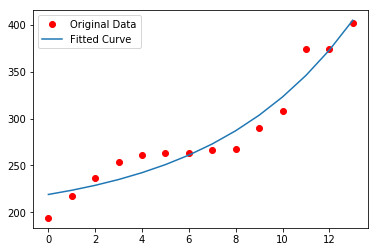

In [237]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import numpy as np
import sympy as sym
n = 45
mm =  31

#x = np.linspace(0, 3, 50)
x = np.arange(0,n-mm,1)
#y = np.exp(x)
y = np.array(ct[mm:n])
print(len(x), len(y))
plt.plot(x, y, 'ro',label="Original Data")
  
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work


def func(x, a, b, c):
    return (a * np.exp(b * x) - c)

popt, pcov = curve_fit(func, x, y)
print(popt)

print( "a = %s , b = %s, c =%s " % (popt[0], popt[1], popt[2]))
print(pcov)

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()

In [238]:
#!pip install sympy
chi1, chi2, chi3 = popt
chi1, chi2, chi3

(25.19518268743067, 0.1635445118091188, -193.85983516829785)

In [239]:
#t0 = (np.log(chi3)-np.log(chi1))/chi2
#t0

8 8
[3.09111960e+02 5.85548667e-02]
a = 309.1119601281908 , b = 0.05855486669819682


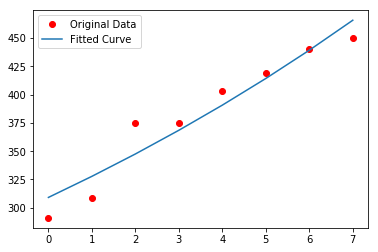

In [240]:
#x = np.linspace(0, 3, 50)
mm = 40
n = 48
#x = np.linspace(0,1,n)
x = np.arange(0,n-mm,1)
#x = x[mm:n]
y = np.array(Ct[mm:n])
print(len(x), len(y))
plt.plot(x, y, 'ro',label="Original Data")
  
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work


def func(x, a, b):
    return (a * np.exp(b * x))

popt, pcov = curve_fit(func, x, y)
print(popt)

print( "a = %s , b = %s" % (popt[0], popt[1]))


plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()

In [241]:
chi1, chi2 = popt

In [242]:
#chi2 = chi2/50

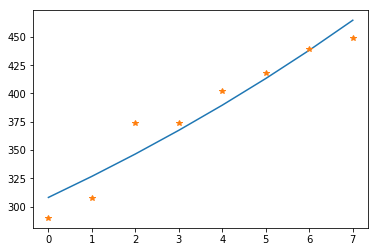

In [243]:
def fu(t):
    return(chi1*np.exp(chi2*(t))-1)
fu(50)


plt.plot(x, fu(x))
#plt.plot(x, U(x))
plt.plot(x, ct[mm:n], "*")
plt.show()

In [244]:
t0 = (-np.log(chi1/10))/chi2
t0, chi2

(-58.596640079029605, 0.05855486669819682)

In [245]:
#def func(t):
#    return(np.log(chi1/10*np.exp(chi2*t)-1))
def func(t):
    return(chi1/10*np.exp(chi2*t)-1)


In [246]:
f = 0.6 #unknown
eta = 1/7
nu = 1/7
#def func(t):
#    return((chi1/10*np.exp(chi2*(t))-1))
func(1), func(2), func(3)
#x = np.array(np.linspace(0,3), dtype=float)

#plt.plot(x, func(x))
#plt.show()
chi1/10, chi2

(30.91119601281908, 0.05855486669819682)

In [247]:
dates[mm+3:n+3]

[datetime.date(2020, 4, 15),
 datetime.date(2020, 4, 16),
 datetime.date(2020, 4, 17),
 datetime.date(2020, 4, 18),
 datetime.date(2020, 4, 19),
 datetime.date(2020, 4, 20),
 datetime.date(2020, 4, 21),
 datetime.date(2020, 4, 22)]

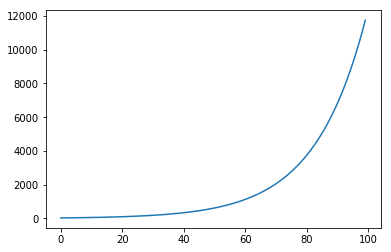

In [248]:
xx = np.arange(100)
plt.plot(xx, 30.91*np.exp(0.06*xx)-1)
plt.show()

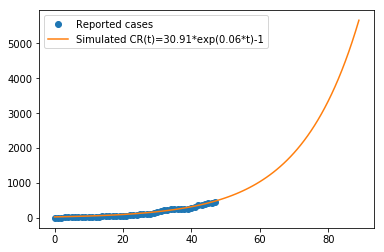

In [294]:
#print([func(i) for i in range(10000)])
plt.plot(ct, 'o', label="Reported cases")
x = np.arange(90)
plt.plot(x,func(x), label="Simulated CR(t)=30.91*exp(0.06*t)-1")
plt.legend()
plt.show()

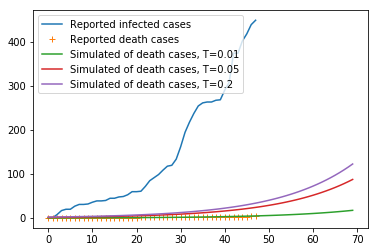

In [329]:
tx1 = 0.01
tx2 = 0.05
cx1 = tx1*chi1/10*np.exp(chi2*x)-1
cx2 = tx2*chi1/10*np.exp(chi2*x)-1
cx3 = 0.07*chi1/10*np.exp(chi2*x)-1
plt.plot(ct, '-', label="Reported infected cases")
plt.plot(mt, '+', label='Reported death cases')
x = np.arange(70)
#plt.plot(x,func(x), label="Simulated CR(t)=30.91*exp(0.06*t)-1")
plt.plot(x,cx1, label="Simulated of death cases, T=0.01")
plt.plot(x,cx2, label="Simulated of death cases, T=0.05")
plt.plot(x,cx3, label="Simulated of death cases, T=0.2")

plt.legend()
plt.show()

In [343]:
507/3.38*0.005, 2026/3.38*0.005

(0.75, 2.9970414201183435)

In [344]:
507/3.38*0.05, 2026/3.38*0.05

(7.5, 29.970414201183434)

In [328]:
cx1[n], cx2[n], cx3[n]

(4.137578524681856, 24.687892623409283, 34.963049672773)

In [310]:
mor(x)

array([ 0.5455598 ,  0.63876194,  0.73758446,  0.8423663 ,  0.9534668 ,
        1.07126702,  1.19617097,  1.32860702,  1.46902938,  1.61791965,
        1.77578848,  1.94317729,  2.12066018,  2.30884585,  2.50837971,
        2.71994609,  2.94427059,  3.18212257,  3.43431777,  3.70172114,
        3.98524978,  4.2858761 ,  4.60463113,  4.94260809,  5.30096613,
        5.6809343 ,  6.08381574,  6.51099221,  6.96392877,  7.44417884,
        7.9533895 ,  8.49330718,  9.0657836 ,  9.67278215, 10.31638463,
       10.99879838, 11.72236383, 12.48956256, 13.30302581, 14.16554345,
       15.08007364, 16.04975288, 17.07790685, 18.16806175, 19.32395643,
       20.54955521, 21.84906148, 23.22693208, 24.68789262, 26.23695371,
       27.87942807, 29.62094882, 31.46748878, 33.42538094, 35.50134017,
       37.70248631, 40.03636851, 42.51099118, 45.13484142, 47.91691812,
       50.86676283, 53.9944925 , 57.31083415, 60.82716168, 64.55553486,
       68.50874073, 72.70033741, 77.14470061, 81.85707294, 86.85

In [250]:
func(1), func(2), func(3), func(0)

(31.775238794217863, 33.75168924465165, 35.84732590170764, 29.91119601281908)

In [251]:
I0 = round(chi2/(f*nu),0)
print(I0)

1.0


In [252]:
tau = (chi2+nu)/S0*(eta+chi2)/((1-f)*nu+eta+chi2)
print(tau)

3.089910059642044e-06


In [253]:
U0 = round((1-f)*nu/(eta+chi2)*I0, 0)
round(U0)

0.0

In [254]:
R0 = (chi2+nu)/nu*(eta+chi2)/((1-f)*nu+eta+chi2)*(1+(((1-f)*nu)/eta))
print(R0)
#tau = R0 * nu /S0 * eta / (1+((1-f)*nu))
#tau

1.5376025270359022


In [255]:
tau = R0 * nu /S0 * eta / (1+((1-f)*nu))
print(tau)

5.845775788511973e-07


In [256]:
n = len(ct)
N = 5077760
f, eta, nu = [0.6, 1/7, 1/7]
tau = 4.55*10**(-6)
def SEIR(inivalue, _):
    Y = np.zeros(4)
    X = inivalue
    # dS/dt
    Y[0] = - tau * X[0] * (X[1] + X[2])
    # dE/dt
    Y[1] = (1 - f) * nu * X[2] - eta * X[1]
    # dI/dt
    Y[2] = tau * X[0] * (X[1] + X[2]) - nu * X[2]
    # dR/dt
    Y[3] = f * nu * X[2] - eta * X[3]
    return Y
RES = spi.odeint(SEIR, (S0,U0,I0,1), Time)

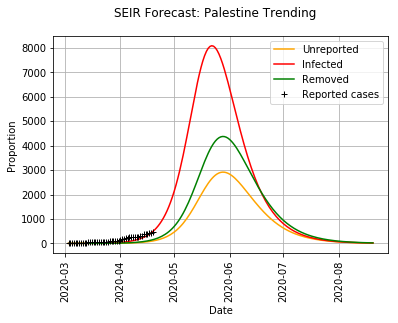

0.6 0.14285714285714285 0.14285714285714285 4.55e-06 8095.0 80 2020-05-22


In [257]:
T = 170
Time = np.arange(0, T + 1)

# create dates
#start_day_palestine = date(2020, 2, 15)
start_day_palestine = date(2020, 3, 3)
dates_palestine = [start_day_palestine + datetime.timedelta(i) for i in range(T + 1)]

start_day = date(2020, 3, 5)
dates = [start_day + datetime.timedelta(i) for i in range(T + 1)]

INI = (S0,U0,I0,1)
# solve the system of differential equations
RES = spi.odeint(SEIR, INI, Time)
#n = len(ct_red)
n = len(ct)
dt = [start_day_palestine + datetime.timedelta(i) for i in range(n)]

#plt.plot(dates_palestine, RES[:,0],color = 'darkblue',label = 'Susceptible')
plt.plot(dates_palestine, RES[:,1],color = 'orange',label = 'Unreported')
plt.plot(dates_palestine, RES[:,2],color = 'red',label = 'Infected')
plt.plot(dates_palestine, RES[:,3],color = 'green',label = 'Removed')
#plt.plot(dt, ct_red, color = 'black', label = 'Reported cases')
plt.plot(dt, ct, "+k", color = 'black', label = 'Reported cases')

#plt.title('Data from Ines Tej')
plt.suptitle('SEIR Forecast: Palestine Trending')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print(f, eta, nu, tau, round(max(RES[:,2]), 0), np.argmax(RES[:,2]), start_day_palestine + datetime.timedelta(int(np.argmax(RES[:,2]))))
# plt.savefig('palestine.png')

In [258]:
R0

1.5376025270359022

In [261]:
max(RES[:,1])

2919.08339469174

In [112]:
print(len(Time))
def sumsq(p):
    tau = p
    def SEIR(inivalue, _):
        Y = np.zeros(4)
        X = inivalue
        # dS/dt
        Y[0] = - tau * X[0] * (X[1] + X[2])
        # dE/dt
        Y[1] = (1 - f) * nu * X[2] - eta * X[1]
        # dI/dt
        Y[2] = tau * X[0] * (X[1] + X[2]) - nu * X[2]
        # dR/dt
        Y[3] = f * nu * X[2] - eta * X[3]
        return Y
    
    RES = spi.odeint(SEIR, (S0,U0,I0,1), Time[:n])
    #print(RES)
    return(sum(RES[:,2] - ct)**2)

msol = minimize(sumsq, [tau], method='Nelder-Mead')
msol.x

171


array([4.83515259e-06])

211


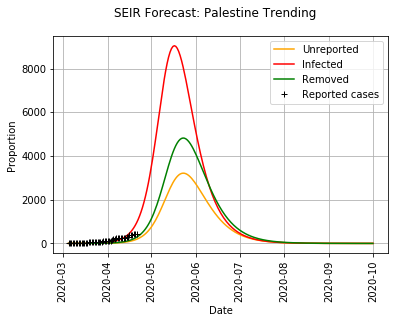

In [113]:
tau = msol.x
def SEIR(inivalue, _):
    Y = np.zeros(4)
    X = inivalue
    # dS/dt
    Y[0] = - tau * X[0] * (X[1] + X[2])
    # dE/dt
    Y[1] = (1 - f) * nu * X[2] - eta * X[1]
    # dI/dt
    Y[2] = tau * X[0] * (X[1] + X[2]) - nu * X[2]
    # dR/dt
    Y[3] = f * nu * X[2] - eta * X[3]
    return Y

T = 210
Time = np.arange(0, T + 1)
#n = len(ct_red)+1
#print(n)
# create dates
#start_day_palestine = date(2020, 3, 24)

start_day_palestine = date(2020, 3, 5)
dates_palestine = [start_day_palestine + datetime.timedelta(n) for n in range(T + 1)]

start_day = date(2020, 3, 3)
dates = [start_day + datetime.timedelta(n) for n in range(T + 1)]

INI = (S0,U0,I0,1)
# solve the system of differential equations
RES = spi.odeint(SEIR, INI, Time)

dt = [start_day_palestine + datetime.timedelta(i) for i in range(n)]
print(len(dates))
#plt.plot(dates_palestine, RES[:,0],color = 'darkblue',label = 'Susceptible')
plt.plot(dates_palestine, RES[:,1],color = 'orange',label = 'Unreported')
plt.plot(dates_palestine, RES[:,2],color = 'red',label = 'Infected')
plt.plot(dates_palestine, RES[:,3],color = 'green',label = 'Removed')
#plt.plot(dt, ct_red, color = 'black', label = 'Reported cases')
plt.plot(dt, ct, "+k", color = 'black', label = 'Reported cases')

#plt.title('Data from Ines Tej')
plt.suptitle('SEIR Forecast: Palestine Trending')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#print(f, eta, nu, tau, round(max(RES[:,2]), 0), np.argmax(RES[:,2]), start_day_palestine + datetime.timedelta(int(np.argmax(RES[:,2]))))
# plt.savefig('palestine.png')

In [187]:

eta = 1/7
f = 0.6
nu = 1/7
tau = 4.55 * 10**(-6)
def sumsq(p):
    f, nu, eta, tau = p
    def SEIR(inivalue, _):
        Y = np.zeros(4)
        X = inivalue
        # dS/dt
        Y[0] = - tau * X[0] * (X[1] + X[2])
        # dE/dt
        Y[1] = (1 - f) * nu * X[2] - eta * X[1]
        # dI/dt
        Y[2] = tau * X[0] * (X[1] + X[2]) - nu * X[2]
        # dR/dt
        Y[3] = f * nu * X[2] - eta * X[3]
        return Y
    
    RES = spi.odeint(SEIR, (S0,U0,I0,1), Time[:n])
    #print(RES)
    return(sum(RES[:,2] - ct)**2)

In [348]:
eta = 1/7
f = 0.6
nu = 1/7
tau = 4.55 * 10**(-6)
S0 = N/100
L = []
RR = []

for j in np.arange(2,9,1):
    for i in np.arange(0.1,0.9,0.1):
        #print(i,j)
        f = i
        nu = 1/j
        r0 = round(tau * S0 / nu * (1+((1-f)*nu/eta)), 2)
        RR += [r0]
        L += [[i, j, r0]]
np.arange(0.1,0.9,0.1), np.arange(8,1,-1)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), array([8, 7, 6, 5, 4, 3, 2]))

/usr/local/Cellar/ipython/6.2.1_1/libexec/vendor/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



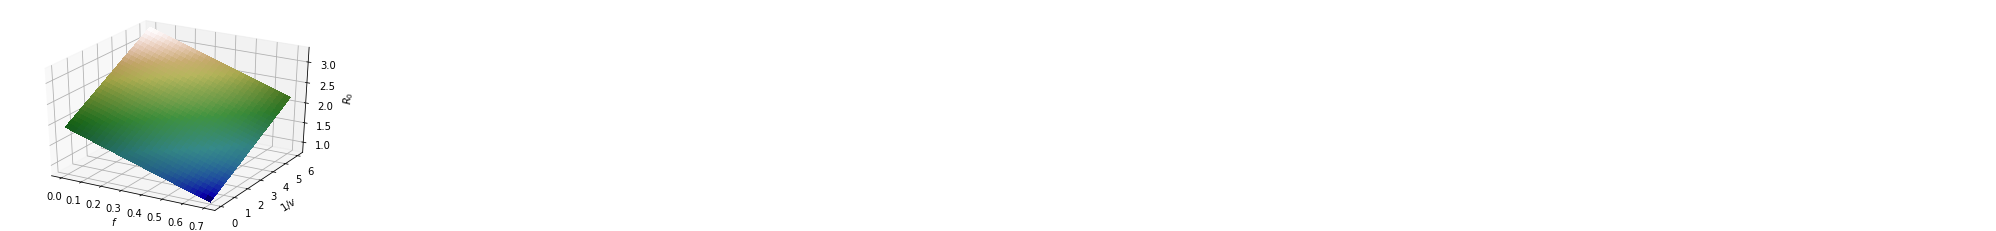

In [349]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource


def poly_matrix(x, y, order=2):
    """ generate Matrix use with lstsq """
    ncols = (order + 1)**2
    G = np.zeros((x.size, ncols))
    ij = itertools.product(range(order+1), range(order+1))
    for k, (i, j) in enumerate(ij):
        G[:, k] = x**i * y**j
    return G


points = np.array(L)

ordr = 2  # order of polynomial
x, y, z = points.T
x, y = x - x[0], y - y[0]  # this improves accuracy

# make Matrix:
G = poly_matrix(x, y, ordr)
# Solve for np.dot(G, m) = z:
m = np.linalg.lstsq(G, z)[0]


# Evaluate it on a grid...
nx, ny = 30, 30
xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), nx),
                     np.linspace(y.min(), y.max(), ny))
GG = poly_matrix(xx.ravel(), yy.ravel(), ordr)
zz = np.reshape(np.dot(GG, m), xx.shape)

# Plotting (see http://matplotlib.org/examples/mplot3d/custom_shaded_3d_surface.html):
fg, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ls = LightSource(270, 45)
rgb = ls.shade(zz, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

#ax.plot3D(x, y, z, "o")
ax.set_xlabel('$f$', fontsize=10, rotation = 0)
ax.set_ylabel('$1/v$', fontsize=10, rotation = 0)
ax.set_zlabel('$R_0$', fontsize=10, rotation = 0)

fg.canvas.draw()
plt.show()

In [350]:
min(RR), max(RR), statistics.median(RR)

(0.79, 3.3, 2.045)

In [351]:
print(RR)

[1.92, 1.76, 1.59, 1.43, 1.27, 1.11, 0.95, 0.79, 2.15, 1.99, 1.83, 1.66, 1.5, 1.34, 1.18, 1.02, 2.38, 2.22, 2.06, 1.89, 1.73, 1.57, 1.41, 1.25, 2.61, 2.45, 2.29, 2.13, 1.96, 1.8, 1.64, 1.48, 2.84, 2.68, 2.52, 2.36, 2.19, 2.03, 1.87, 1.71, 3.07, 2.91, 2.75, 2.59, 2.43, 2.26, 2.1, 1.94, 3.3, 3.14, 2.98, 2.82, 2.66, 2.5, 2.33, 2.17]


In [354]:
L[6], L[7]

([0.7000000000000001, 2, 0.95], [0.8, 2, 0.79])

In [352]:
print(L)

[[0.1, 2, 1.92], [0.2, 2, 1.76], [0.30000000000000004, 2, 1.59], [0.4, 2, 1.43], [0.5, 2, 1.27], [0.6, 2, 1.11], [0.7000000000000001, 2, 0.95], [0.8, 2, 0.79], [0.1, 3, 2.15], [0.2, 3, 1.99], [0.30000000000000004, 3, 1.83], [0.4, 3, 1.66], [0.5, 3, 1.5], [0.6, 3, 1.34], [0.7000000000000001, 3, 1.18], [0.8, 3, 1.02], [0.1, 4, 2.38], [0.2, 4, 2.22], [0.30000000000000004, 4, 2.06], [0.4, 4, 1.89], [0.5, 4, 1.73], [0.6, 4, 1.57], [0.7000000000000001, 4, 1.41], [0.8, 4, 1.25], [0.1, 5, 2.61], [0.2, 5, 2.45], [0.30000000000000004, 5, 2.29], [0.4, 5, 2.13], [0.5, 5, 1.96], [0.6, 5, 1.8], [0.7000000000000001, 5, 1.64], [0.8, 5, 1.48], [0.1, 6, 2.84], [0.2, 6, 2.68], [0.30000000000000004, 6, 2.52], [0.4, 6, 2.36], [0.5, 6, 2.19], [0.6, 6, 2.03], [0.7000000000000001, 6, 1.87], [0.8, 6, 1.71], [0.1, 7, 3.07], [0.2, 7, 2.91], [0.30000000000000004, 7, 2.75], [0.4, 7, 2.59], [0.5, 7, 2.43], [0.6, 7, 2.26], [0.7000000000000001, 7, 2.1], [0.8, 7, 1.94], [0.1, 8, 3.3], [0.2, 8, 3.14], [0.30000000000000

In [ ]:
S0, I0, U0

In [ ]:
S0 = 51.47 * 10**6
data = [291, 440, 571, 830, 1287, 1975, 2744, 4515, 5974, 7711]
#data = [9, 17, 25, 41, 56, 80, 106, 132, 170]
mm = len(data)
#data = [data[i]/data[mm-1] for i in range(mm)]

x = np.arange(mm)
y = np.array(data)
print(len(x), len(y))
plt.plot(x, y, 'ro',label="Original Data")
  
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work


def func(x, a, b, c):
    return (a * np.exp(b * x) - c)

popt, pcov = curve_fit(func, x, y)
#print(popt)

print( "a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2]))


plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()
chi1, chi2, chi3 = popt
#print(chi2)

In [ ]:
t0 = (-np.log(chi1))/chi2
print(t0)
I0 = round(chi2/(f*nu),0)
print(I0)
tau = (chi2+nu)/S0*(eta+chi2)/((1-f)*nu+eta+chi2)
print(tau)
U0 = round((1-f)*nu/(eta+chi2)*I0, 0)
round(U0)
R0 = (chi2+nu)/nu*(eta+chi2)/((1-f)*nu+eta+chi2)*(1+(((1-f)*nu)/eta))
print(R0)

In [ ]:
def I(t):
    return(I0*np.exp (chi2 *(t - t0)))

In [ ]:
def U(t):
    return(U0*np.exp (chi2 *(t - t0)))

In [ ]:
def I(t):
    return(chi1*np.exp (chi2 *(t))-chi3)

#x = np.array(np.linspace(0,1,mm), dtype=float)

plt.plot(x, I(x))
#plt.plot(x, U(x))
plt.plot(x, data)
plt.show()

In [ ]:
N

In [ ]:
for i in range(n):
    print(dates[i],'&', ct[i],'&', mt[i], '\\', '\hline')

In [ ]:
#Jordan
N = 10203134
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,8,17,34,52,69,85,85,112,127,154,172,212,235,246,259,268,274,278,299,310,323,345,349,353,358,372,372,381,389,391,397,401,402,407,413,417,425,428,435
]
mt = [31.24,36.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,5,5,5,5,5,5,5,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7
]
n = len(ct)-1
print(n)
Jc = [ct[i]/N*10**(6) for i in range(n)]
Jm = [mt[i]/N*10**(3) for i in range(n)]
round(Jm[n-1]/Jc[n-1], 7)

In [ ]:
#Israel
N = 8655535
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,3,4,7,10,10,12,15,20,37,43,61,61,75,79,100,126,155,213,218,250,304,427,529,712,883,1071,1238,2369,2693,3035,3619,4247,4695,5358,6092,6857,7428,7851,8430,8904,9248,9404,9968,10408,10743,11145,11586,12046,12501,12758,12982,13265,13491,13713,13942,14498
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,5,8,12,12,15,16,20,26,36,40,44,49,57,65,73,86,95,101,103,116,123,130,142,151,164,172,177,184,189
,]
n = len(ct)-1
print(n)
Ic = [ct[i]/N*10**(6) for i in range(n)]
Im = [mt[i]/N*10**(3) for i in range(n)]
round(Im[n-1]/Ic[n-1], 7)

In [ ]:
#Iran
N = 83992949
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494,80868,82211,83505,84802,85996
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,5,8,12,16,19,26,34,43,54,66,77,92,107,124,145,194,237,291,354,429,514,611,724,853,988,1135,1284,1433,1556,1685,1812,1934,2077,2234,2378,2517,2640,2757,2898,3036,3160,3294,3452,3603,3739,3872,3993,4110,4232,4357,4474,4585,4683,4777,4869,4958,5031,5118,5209,5297,5391
]
n = len(ct)-1
print(n)
IRc = [ct[i]/N*10**(6) for i in range(n)]
IRm = [mt[i]/N*10**(3) for i in range(n)]
round(IRm[n-1]/IRc[n-1], 7)

In [ ]:
#Palestine
N = 5077760
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 7, 16, 19, 19, 26, 30, 30, 31, 35, 38, 38, 39, 44, 44, 47, 48, 52, 59, 59, 60, 71, 84, 91,
 98, 108, 117, 119, 133, 161, 194, 217, 237, 254, 261, 263, 263, 267, 268, 290, 308, 374, 374, 402, 418, 439, 449,466]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,4]
n = len(ct)-1
print(n)
Pc = [ct[i]/N*10**(6) for i in range(n)]
Pm = [mt[i]/N*10**(3) for i in range(n)]
round(Pm[n-1]/Pc[n-1], 7)

In [ ]:
#Egypt
N = 102334404
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,3,15,15,49,55,59,60,67,80,109,110,150,196,196,256,285,294,327,366,402,456,495,536,576,609,656,710,779,865,985,1070,1173,1322,1450,1560,1699,1794,1939,2065,2190,2350,2505,2673,2844,3032,3144,3333,3490,3659
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,4,6,6,8,10,14,19,20,21,24,30,36,40,41,46,52,58,66,71,78,85,94,103,118,135,146,159,164,178,183,196,205,224,239,250,264,276
]
n = len(ct)-1
print(n)
Ec = [ct[i]/N*10**(6) for i in range(n)]
Em = [mt[i]/N*10**(3) for i in range(n)]
round(Em[n-1]/Ec[n-1], 7)

In [ ]:
#Lebanon
N = 6825445
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,4,10,13,13,13,16,22,22,32,32,41,61,61,77,93,110,110,120,133,157,163,187,248,267,318,333,368,391,412,438,446,470,479,494,508,520,527,541,548,576,582,609,619,630,632,641,658,663,668,672,673,677,677,682
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,4,4,4,4,4,6,6,8,8,10,11,12,14,16,17,17,18,19,19,19,19,20,20,20,20,21,21,21,21,21,21,21,21,22
]
n = len(ct)-1
print(n)
Lc = [ct[i]/N*10**(6) for i in range(n)]
Lm = [mt[i]/N*10**(3) for i in range(n)]
round(Lm[n-1]/Lc[n-1], 7)

In [ ]:
#Syria
N = 17500658
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,5,5,5,9,10,10,10,16,16,16,19,19,19,19,19,19,25,25,25,29,33,33,38,38,39,39,42,42
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3
]
n = len(ct)-1
print(n)
Sc = [ct[i]/N*10**(6) for i in range(n)]
Sm = [mt[i]/N*10**(3) for i in range(n)]
round(Sm[n-1]/Sc[n-1], 7)

In [ ]:
#Iraq
N = 40222493
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,7,7,13,19,26,32,35,35,40,54,60,60,71,71,71,101,110,116,124,154,164,192,208,214,233,266,316,346,382,458,506,547,630,694,728,772,820,878,961,1031,1122,1202,1232,1279,1318,1352,1378,1400,1415,1434,1482,1513,1539,1574,1602,1631
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,4,6,6,7,7,8,9,10,10,10,11,12,13,17,17,20,23,27,29,36,40,42,42,46,50,52,54,54,56,61,64,65,69,69,70,72,76,78,78,79,80,81,82,82,82,83,83
]
n = len(ct)-1
print(n)
Irc = [ct[i]/N*10**(6) for i in range(n)]
Irm = [mt[i]/N*10**(3) for i in range(n)]
round(Irm[n-1]/Irc[n-1], 7)

In [ ]:
#Saudi Arabia
N = 34813871
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,5,5,5,11,15,20,21,45,86,103,103,118,171,171,274,344,392,511,562,767,900,1012,1104,1203,1299,1453,1563,1720,1885,2039,2179,2402,2605,2795,2932,3287,3651,4033,4462,4934,5369,5862,6380,7142,8274,9362,10484,11631,12772
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,4,8,8,10,16,21,25,29,34,38,41,41,44,47,52,59,65,73,79,83,87,92,97,103,109,114
]
n = len(ct)-1
print(n)
Sac = [ct[i]/N*10**(6) for i in range(n)]
Sam = [mt[i]/N*10**(3) for i in range(n)]
round(Sam[n-1]/Sac[n-1], 7)

In [ ]:
#Turkey
N = 84339067
ct = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,5,6,18,47,98,192,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546,82329,86306,90980,95591,98674
]
mt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,4,9,30,37,44,59,75,92,108,131,168,214,277,356,425,501,574,649,725,812,908,1006,1101,1198,1296,1403,1518,1643,1769,1890,2017,2140,2259,2376
]
n = len(ct)-1
print(n)
Tc = [ct[i]/N*10**(6) for i in range(n)]
Tm = [mt[i]/N*10**(3) for i in range(n)]
round(Tm[n-1]/Tc[n-1], 7)

In [ ]:
a = 18
b = 0
register_matplotlib_converters()
plt.plot(Pm[a+b:n], Pc[b:n-a], 'o', color = 'green', label = 'Palestine')
plt.plot(IRm[a+b:n], IRc[b:n-a], 'o', color = 'blue', label = 'Iran')
plt.plot(Jm[a+b:n], Jc[b:n-a], 'o', color = 'orange', label = 'Jordan')
plt.plot(Em[a+b:n], Ec[b:n-a], 'o', color = 'black', label = 'Egypt')
plt.plot(Im[a+b:n], Ic[b:n-a], 'o', color = 'green', label = 'Israel')
plt.plot(Lm[a+b:n], Lc[b:n-a], 'o', color = 'grey', label = 'Lebanon')

plt.legend()
plt.xlabel('Number of death at t0 (per mile)')
plt.ylabel('Number of cases at t0-x (per million)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
xx = np.arange(len(Ic))
plt.plot(xx, Ic, '-', color="green", label='Israel') 
plt.plot(xx, Tc, '-', label="Turkey", color="red") 
plt.plot(xx, IRc, '-', label="Iran", color="black")
plt.plot(xx, Sac, '-', label="Saudi Arabia", color="yellow")


plt.legend()
plt.ylabel('Number of cases (per million)')
plt.xlabel('Time (day)')
plt.xticks(rotation=90)
plt.grid()
plt.show()
plt.show()

In [ ]:
plt.plot(xx, Pc, '-', label="Palestine", color="blue")
plt.plot(xx, Ec, '-', label="Egypt", color="grey")
plt.plot(xx, Jc, '-', label="Jordan", color="orange")
plt.plot(xx, Sc, '-', label="Syria", color="red")
plt.plot(xx, Irc, '-', label="Iraq", color="pink")
plt.plot(xx, Lc, '-', label="Lebanon", color="black")

plt.legend()
plt.ylabel('Number of cases (per million)')
plt.xlabel('Time (day)')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
xx = np.arange(len(Ic))
plt.plot(xx, Im, '-', color="green", label='Israel') 
plt.plot(xx, Tm, '-', label="Turkey", color="red") 
plt.plot(xx, IRm, '-', label="Iran", color="black")

plt.legend()
plt.ylabel('Number of death (per miles)')
plt.xlabel('Time (day)')
plt.xticks(rotation=90)
plt.grid()
plt.show()
plt.show()

In [ ]:
plt.plot(xx, Pm, '-', label="Palestine", color="blue")
plt.plot(xx, Em, '-', label="Egypt", color="grey")
plt.plot(xx, Sm, '-', label="Syria", color="red")
plt.plot(xx, Irm, '-', label="Iraq", color="pink")
plt.plot(xx, Lm, '-', label="Lebanon", color="orange")
plt.plot(xx, Sam, '-', label="Saudi Arabia", color="yellow")
plt.plot(xx, Jm, '-', label="Jordan", color="darkblue")


plt.legend()
plt.ylabel('Number of death (per miles)')
plt.xlabel('Time (day)')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
from pylab import * 


y = Im[a+b:n]
y = np.array(y)
X = Ic[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="green") 
plt.plot(X, m*X+p, '-', label="Israel", color="green")

y = Tm[a+b:n]
y = np.array(y)
X = Tc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="red") 
plt.plot(X, m*X+p, '-', label="Turkey", color="red")

y = IRm[a+b:n]
y = np.array(y)
X = IRc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="black") 
plt.plot(X, m*X+p, '-', label="Iran", color="black")

plt.legend()
plt.ylabel('Number of death at t0 (per mile)')
plt.xlabel('Number of cases at t0-18 days (per million)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:

y = Pm[a+b:n]
y = np.array(y)
X = Pc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="green") 
plt.plot(X, m*X+p, '-', label="Palestine", color="green")

y = Em[a+b:n]
y = np.array(y)
X = Ec[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="red") 
plt.plot(X, m*X+p, '-', label="Egypt", color="red")


y = Jm[a+b:n]
y = np.array(y)
X = Jc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="orange") 
plt.plot(X, m*X+p, '-', label="Jordan", color="orange")

y = Sam[a+b:n]
y = np.array(y)
X = Sac[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="grey") 
plt.plot(X, m*X+p, '-', label="Saudi Arabia", color="grey")


plt.legend()
plt.ylabel('Number of death at t0 (per mile)')
plt.xlabel('Number of cases at t0-18 days (per million)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
y = Lm[a+b:n]
y = np.array(y)
X = Lc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="yellow") 
plt.plot(X, m*X+p, '-', label="Lebanon", color="yellow")

y = Irm[a+b:n]
y = np.array(y)
X = Irc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="darkblue") 
plt.plot(X, m*X+p, '-', label="Iraq", color="darkblue")

plt.legend()
plt.ylabel('Number of death at t0 (per mile)')
plt.xlabel('Number of cases at t0-18 days (per million)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
y = Sm[a+b:n]
y = np.array(y)
X = Sc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="orange") 
plt.plot(X, m*X+p, '-', label="Syria", color="orange")

plt.legend()
plt.ylabel('Number of death at t0 (per mile)')
plt.xlabel('Number of cases at t0-18 days (per million)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
y = IRm[a+b:n]
y = np.array(y)
X = IRc[b:n-a]
X = np.array(X)
m,p = polyfit(X, y, 1) 
plt.plot(X, y, '+', color="black") 
plt.plot(X, m*X+p, '-', label="Iran", color="black")

plt.legend()
plt.ylabel('Number of death at t0 (per mile)')
plt.xlabel('Number of cases at t0-18 days (per million)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
import statistics
statistics.median([1.6, 0.7, 7.6, 3.1, 6.3, 1.3, 7.1, 5.2, 0.9, 2.4])